# **Binary Classification of kickstarter project success prediction**

**Team:**

Alavala Satyanadh Reddy - 016037957

Venkata Chandu Konduru  - 016726775


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Reading the data from .csv file

kickstarter_df = pd.read_csv('/content/kickstarter_data_full.csv', index_col=0)

In [ ]:
# Checking the shape of dataset

kickstarter_df.shape

(20632, 67)

In [ ]:
total_cells = np.product(kickstarter_df.shape)
total_missing = kickstarter_df.isnull().sum().sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing values in the dataset: {:.2f}%".format(percent_missing))


Percentage of missing values in the dataset: 6.09%


In [ ]:
#Checking the number of null values for each variable

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20627 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 13  deadline        

**We can observe that mainly four variables "friends", "is_starred",  "is_backing", "permissions" are having more than 90% of null values. In the next step we will drop these four variables.**

In [ ]:
#Dropping the columns having more than 90% of null values.

cols_to_drop = ['friends', 'is_starred', 'is_backing', 'permissions']
kickstarter_df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [ ]:
#Shape of data after dropping columns

kickstarter_df.shape

(20632, 63)

In [ ]:
#Making a copy of data for data visualization before dropping the unnecessary columns. 

Data_Visualization = kickstarter_df.copy()

In [ ]:
#We manually identified some features which are not useful for prediction and dropping them.

Features_to_drop = ['id', 'name','blurb','photo','slug','currency_symbol','currency_trailing_code', 
                   'creator','location','urls','source_url','name_len','spotlight','blurb_len',
                   'create_to_launch','launch_to_deadline','launch_to_state_change','deadline_day', 
                   'deadline_hr','state_changed_at_day', 'state_changed_at_hr', 'created_at_day', 
                   'created_at_hr','launched_at_day', 'launched_at_hr','name_len_clean','blurb_len_clean',
                   'state_changed_at','deadline_weekday','state_changed_at_weekday','created_at_weekday',
                   'launched_at_weekday','deadline','created_at','launched_at','create_to_launch_days', 
                   'launch_to_deadline_days','launch_to_state_change_days','SuccessfulBool','USorGB',
                   'TOPCOUNTRY','LaunchedTuesday','DeadlineWeekend', 'profile'
                    ]

kickstarter_df.drop(labels=Features_to_drop, axis=1, inplace=True)

In [ ]:
#We observed that there are around 2000 rows having null values, so dropping the rows with null values.

kickstarter_clean = kickstarter_df.dropna()

In [ ]:
#Shape of data after dropping columns and rows.

kickstarter_clean.shape

(18743, 19)

In [ ]:
kickstarter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18743 entries, 0 to 20631
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    18743 non-null  float64
 1   pledged                 18743 non-null  float64
 2   state                   18743 non-null  object 
 3   disable_communication   18743 non-null  bool   
 4   country                 18743 non-null  object 
 5   currency                18743 non-null  object 
 6   staff_pick              18743 non-null  bool   
 7   backers_count           18743 non-null  int64  
 8   static_usd_rate         18743 non-null  float64
 9   usd_pledged             18743 non-null  float64
 10  category                18743 non-null  object 
 11  deadline_month          18743 non-null  int64  
 12  deadline_yr             18743 non-null  int64  
 13  state_changed_at_month  18743 non-null  int64  
 14  state_changed_at_yr     18743 non-null

**We can observe that some columns are having their data type as bool and object. So we encode them.**

In [ ]:
print(kickstarter_clean['state'].unique())

['failed' 'live' 'successful' 'canceled' 'suspended']


In [ ]:
print(kickstarter_clean['category'].unique())
print(kickstarter_clean['country'].unique())
print(kickstarter_clean['currency'].unique())
print(kickstarter_clean['disable_communication'].unique())
print(kickstarter_clean['staff_pick'].unique())

['Academic' 'Places' 'Blues' 'Restaurants' 'Webseries' 'Thrillers'
 'Shorts' 'Web' 'Apps' 'Gadgets' 'Hardware' 'Festivals' 'Plays' 'Musical'
 'Flight' 'Spaces' 'Immersive' 'Experimental' 'Comedy' 'Wearables' 'Sound'
 'Software' 'Robots' 'Makerspaces']
['US' 'DE' 'GB' 'CA' 'AU' 'AT' 'CH' 'NZ' 'IT' 'MX' 'NL' 'SE' 'ES' 'DK'
 'IE' 'NO' 'FR' 'BE' 'LU' 'SG' 'HK']
['USD' 'EUR' 'GBP' 'CAD' 'AUD' 'CHF' 'NZD' 'MXN' 'SEK' 'DKK' 'NOK' 'SGD'
 'HKD']
[False  True]
[False  True]


In [ ]:
# Perform categorical encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
kickstarter_clean['category'] = le.fit_transform(kickstarter_clean['category'])
kickstarter_clean['country'] = le.fit_transform(kickstarter_clean['country'])
kickstarter_clean['currency'] = le.fit_transform(kickstarter_clean['currency'])


In [ ]:
kickstarter_clean['disable_communication'] = kickstarter_clean['disable_communication'] * 1 #converts type bool to 0 for false and 1 for true
kickstarter_clean['staff_pick'] = kickstarter_clean['staff_pick'] * 1 #converts type bool to 0 for false and 1 for true

In [ ]:
#We are copying the data in to two variables, one for binary classification and one for multi classification.

kickstarter_Binary = kickstarter_clean.copy()

In [ ]:
#This is for Binary classification.
category = {'successful': 1, 'cancelled': 0, 'failed': 0, 'live':0,'suspended':0}

# add default value for any other state value
default_value = 0
kickstarter_Binary['state'] = kickstarter_Binary['state'].map(category).fillna(default_value)


In [ ]:
kickstarter_Binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18743 entries, 0 to 20631
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    18743 non-null  float64
 1   pledged                 18743 non-null  float64
 2   state                   18743 non-null  float64
 3   disable_communication   18743 non-null  int64  
 4   country                 18743 non-null  int64  
 5   currency                18743 non-null  int64  
 6   staff_pick              18743 non-null  int64  
 7   backers_count           18743 non-null  int64  
 8   static_usd_rate         18743 non-null  float64
 9   usd_pledged             18743 non-null  float64
 10  category                18743 non-null  int64  
 11  deadline_month          18743 non-null  int64  
 12  deadline_yr             18743 non-null  int64  
 13  state_changed_at_month  18743 non-null  int64  
 14  state_changed_at_yr     18743 non-null

In [ ]:
# Select only the continuous variables
kickstarter_cont = kickstarter_clean.select_dtypes(include=['float64', 'int64'])

# Use pairplot to create a grid of scatterplots for each pair of variables
# sns.pairplot(kickstarter_cont)
plt.show()


# **DATA VISUALIZATION**

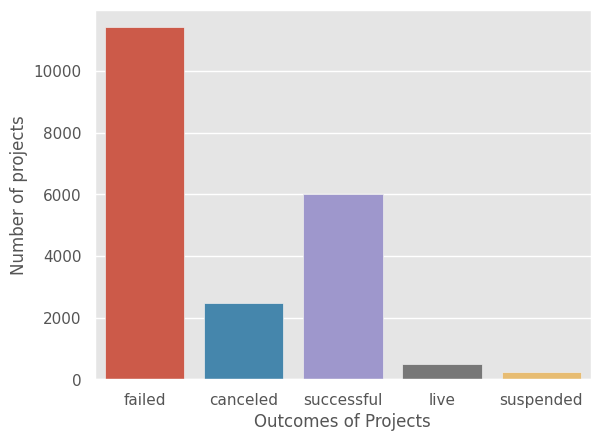

In [ ]:
# create a bar plot of state
sns.countplot(x='state', data=Data_Visualization)

# set the title and axis labels
plt.title('')
plt.xlabel('Outcomes of Projects')
plt.ylabel('Number of projects')

# show the plot
plt.show()


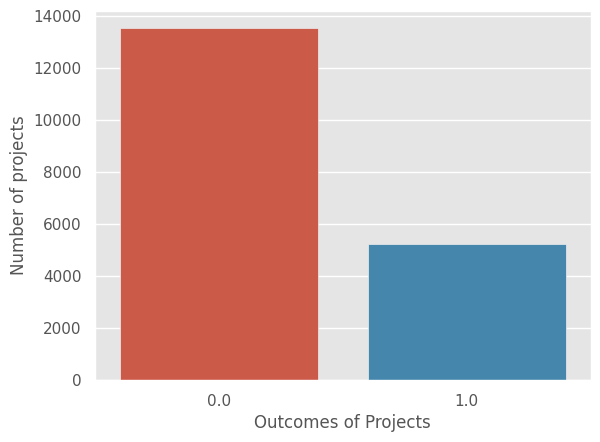

In [ ]:
# create a bar plot of state
sns.countplot(x='state', data=kickstarter_Binary)

# set the title and axis labels
plt.title('')
plt.xlabel('Outcomes of Projects')
plt.ylabel('Number of projects')

# show the plot
plt.show()


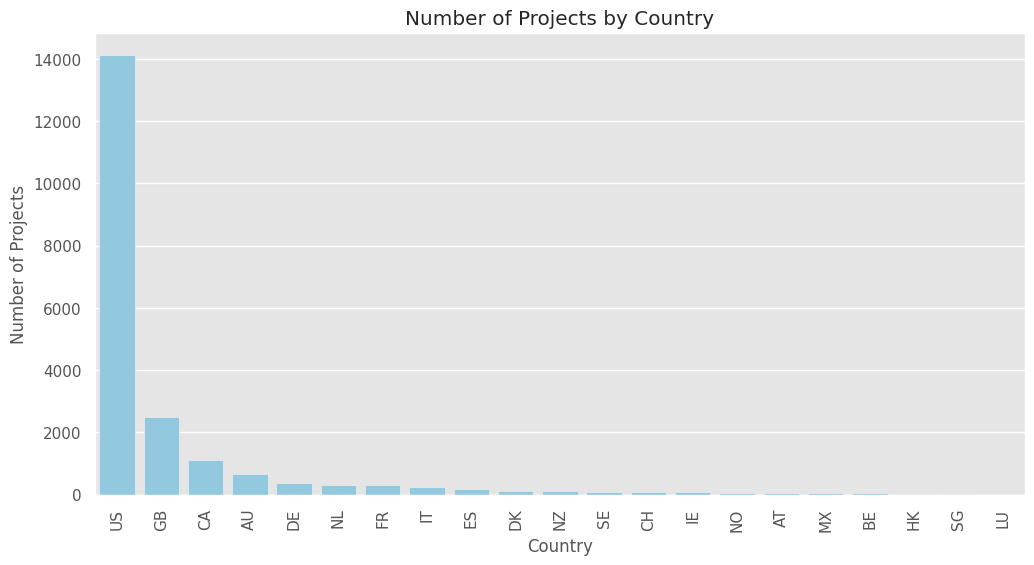

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of projects for each country
country_counts = Data_Visualization['country'].value_counts()

# create a bar plot of country_counts
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color='skyblue')

# set the title and axis labels
plt.title('Number of Projects by Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')

# rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# show the plot
plt.show()


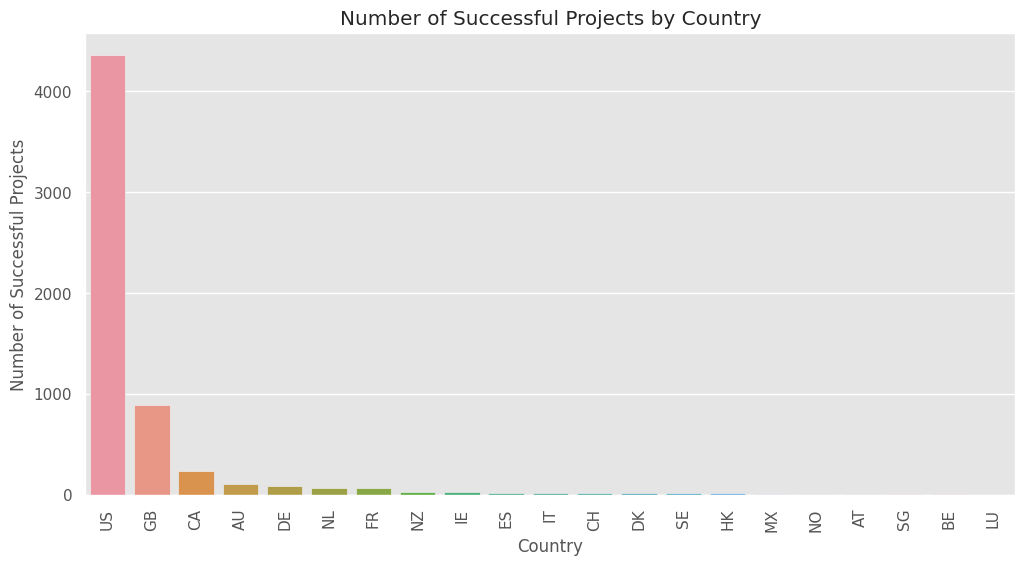

In [ ]:
# group the data by country and count the number of successful projects
success_by_country = Data_Visualization[Data_Visualization['state'] == 'successful'].groupby('country').size().reset_index(name='count')

# sort the data by count in descending order
success_by_country = success_by_country.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
# create a bar plot of the data
sns.barplot(x='country', y='count', data=success_by_country)

# set the title and axis labels
plt.title('Number of Successful Projects by Country')
plt.xlabel('Country')
plt.ylabel('Number of Successful Projects')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# show the plot
plt.show()


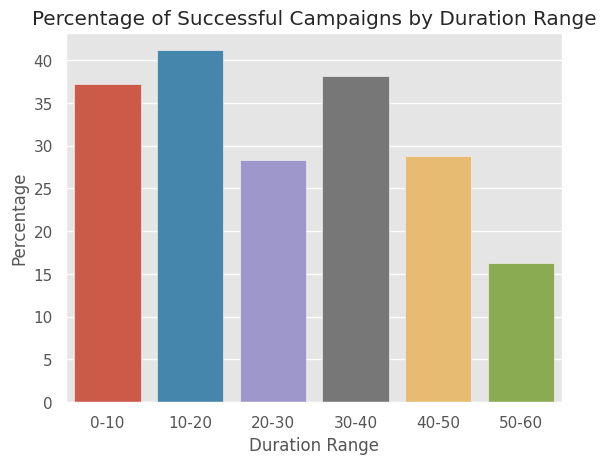

In [ ]:
# create a new column for duration ranges
Data_Visualization['duration_range'] = pd.cut(Data_Visualization['launch_to_deadline_days'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'])

# calculate percentage of successful campaigns for each duration range
duration_counts = Data_Visualization.groupby('duration_range')['state'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# filter for successful campaigns only
duration_success = duration_counts[duration_counts['state']=='successful']

# create a bar plot using barplot() in Seaborn
sns.barplot(x='duration_range', y='percent', data=duration_success)
plt.title('Percentage of Successful Campaigns by Duration Range')
plt.xlabel('Duration Range')
plt.ylabel('Percentage')
plt.show()


In [ ]:
import json

def extract_city_name(json_str):
    try:
      data = json.loads(str(json_str))
    except json.decoder.JSONDecodeError:
      return "Other"
    location_url = data['urls']['web']['location']
    # city = location_url.split('/')[-1].split('-')[0].capitalize()
    city = location_url.split('/')[-1].capitalize()
    return city

In [ ]:
category = {'successful': 1, 'cancelled': 0, 'failed': 0, 'live':0,'suspended':0}

# add default value for any other state value
default_value = 0
Data_Visualization['state'] = Data_Visualization['state'].map(category).fillna(default_value)

In [ ]:
city_list = []
for i in Data_Visualization['location']:
  city_list.append(extract_city_name(str(i)))

Data_Visualization['city'] = Data_Visualization['location'].apply(extract_city_name)

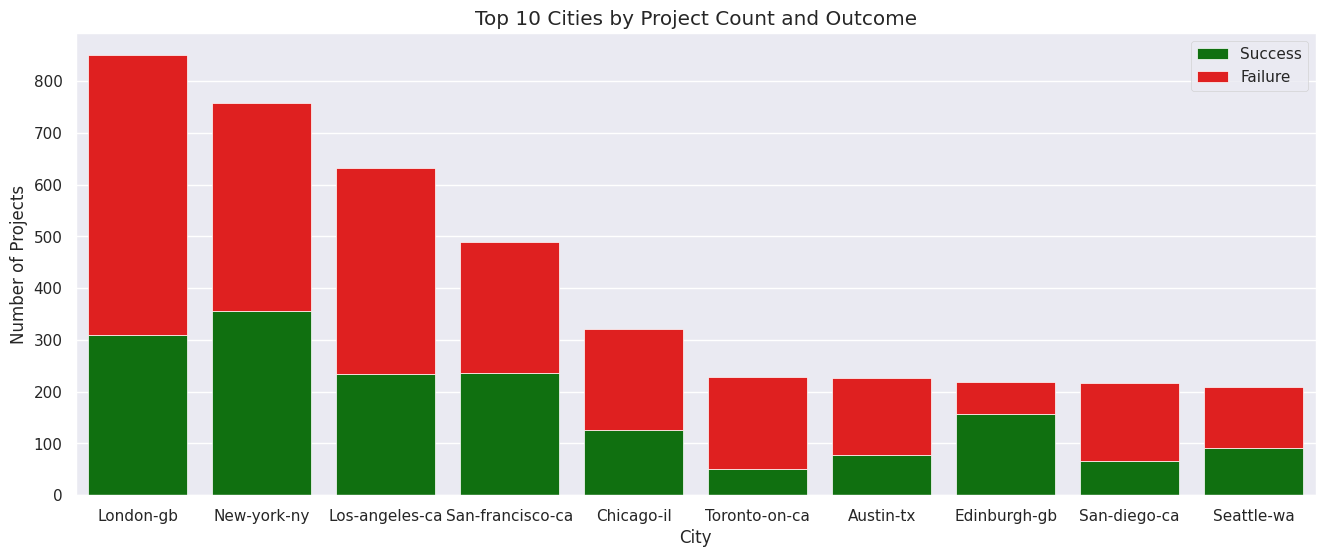

In [ ]:
# Group the data by city and outcome and calculate the counts of projects
grouped = Data_Visualization.groupby(['city', 'state']).size().reset_index(name='count')

# Pivot the data to have cities as rows and outcomes as columns
pivoted = grouped.pivot(index='city', columns='state', values='count')

# Select the top 6 cities by total project count
top_cities = pivoted.sum(axis=1).sort_values(ascending=False).head(10).index

# Subset the data to only include the top 10 cities
subset = pivoted.loc[top_cities]

# Plot a stacked bar chart of the top 10 cities by project count and outcome
sns.set_style('darkgrid')
plt.figure(figsize=(16, 6))
sns.barplot(data=subset, x=subset.index, y= 1, color='green', label='Success')
sns.barplot(data=subset, x=subset.index, y= 0, color='red', label='Failure', bottom=subset[1])
plt.title('Top 10 Cities by Project Count and Outcome')
plt.xlabel('City')
plt.ylabel('Number of Projects')
plt.legend()
plt.show()

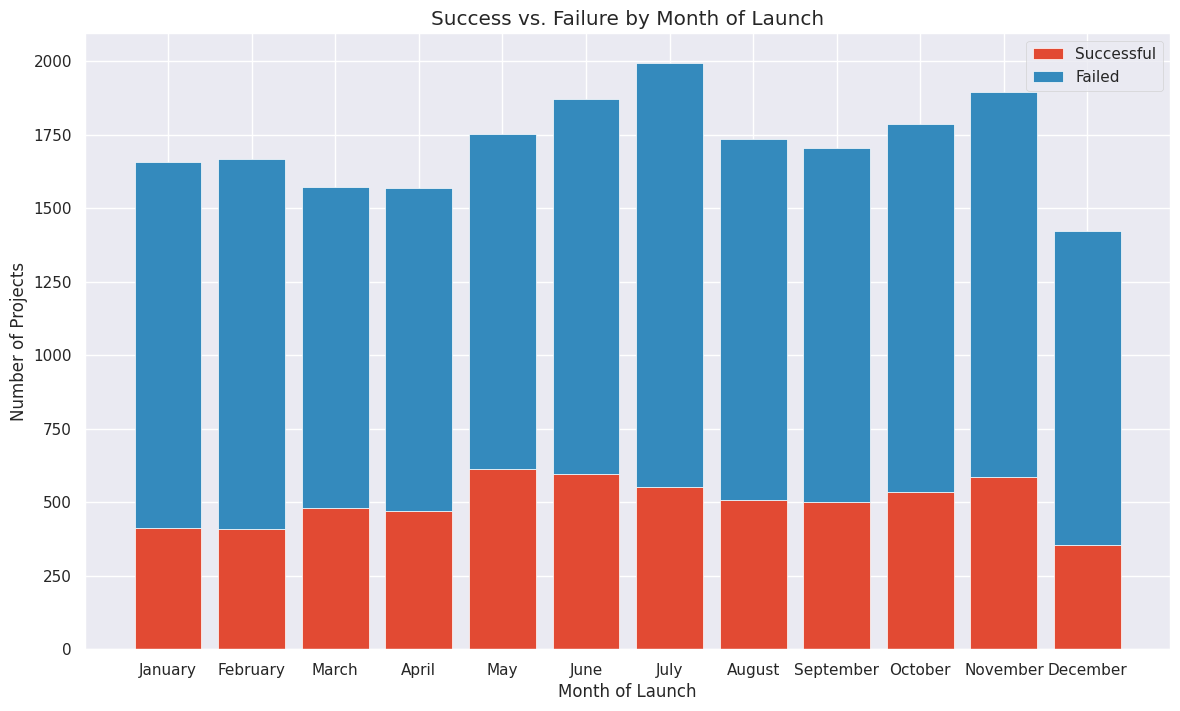

In [ ]:
import matplotlib.pyplot as plt

df = Data_Visualization.copy()
# Assuming the data is stored in a pandas dataframe called 'df'
df_success = df[df['state'] == 1]
df_fail = df[df['state'] == 0]

# Count number of successful and failed projects for each month
success_counts = df_success.groupby('launched_at_month')['state'].count()
fail_counts = df_fail.groupby('launched_at_month')['state'].count()

import calendar
# Get month names from month numbers
months = [calendar.month_name[i] for i in range(1,13)]

plt.figure(figsize=(14, 8))

# Plot stacked bar chart
plt.bar(success_counts.index, success_counts.values, label='Successful')
plt.bar(fail_counts.index, fail_counts.values, bottom=success_counts.values, label='Failed')

# Set axis labels
plt.xlabel('Month of Launch')
plt.ylabel('Number of Projects')

# Set x-tick labels
plt.xticks(range(1,13), months)

# Set plot title
plt.title('Success vs. Failure by Month of Launch')

# Add legend
plt.legend()

# Display the plot
plt.show()


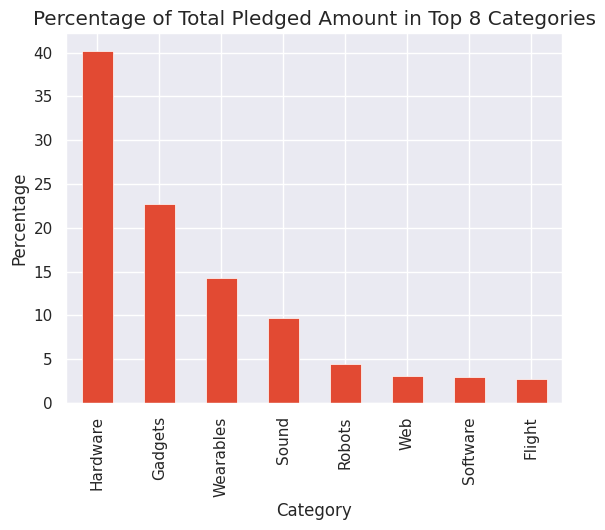

In [ ]:

subset = Data_Visualization[['category', 'pledged']]

# group by category and sum the pledged amounts
grouped = subset.groupby('category').sum()

# sort the categories by the sum of pledged amounts in descending order and select the top eight
top_categories = grouped.sort_values('pledged', ascending=False).head(8)

# calculate the percentage of total pledged amount in all categories for each top category
total_pledged = top_categories['pledged'].sum()
top_categories['percentage'] = top_categories['pledged'] / total_pledged * 100

# create a bar plot of the top categories and their percentages
ax = top_categories.plot(kind='bar', y='percentage', legend=False)
ax.set_title('Percentage of Total Pledged Amount in Top 8 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Percentage')

plt.show()


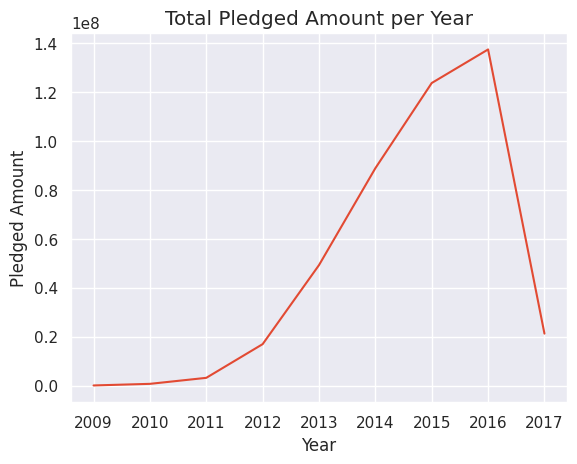

In [ ]:
# group the data by deadline year and sum the pledged amounts for each year
pledged_per_year = Data_Visualization.groupby('deadline_yr')['pledged'].sum()

# plot a line graph of pledged amounts per year
plt.plot(pledged_per_year.index, pledged_per_year.values)
plt.title('Total Pledged Amount per Year')
plt.xlabel('Year')
plt.ylabel('Pledged Amount')
plt.show()

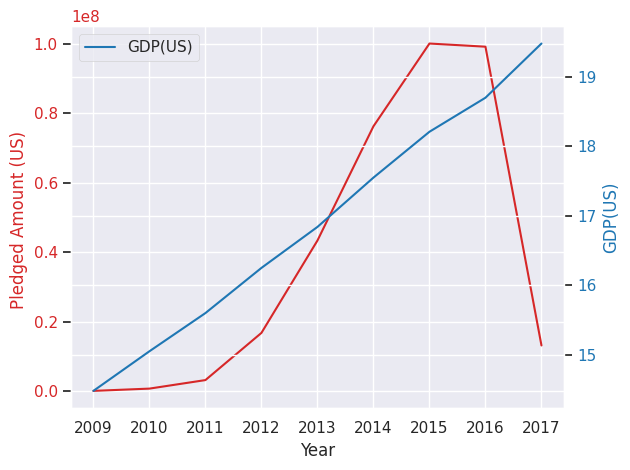

In [ ]:
#This gdp values of united states is taken from worldbank data for analysis.
gdp = [14.48,15.05,15.6,16.25, 16.84, 17.55, 18.21, 18.7, 19.48]

pledged_per_year = Data_Visualization[Data_Visualization['country'] == 'US'].groupby('deadline_yr')['pledged'].sum()
x = pledged_per_year.index

y1 = pledged_per_year.values
y2 = gdp

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Pledged Amount (US) ', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# create line plot for y2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('GDP(US)', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.tight_layout()
# add title and legend
# plt.title('Line plot with different scaling')
plt.legend(['GDP(US)', 'Pledged Amount (US) '])

# show plot
plt.show()

# **Feature Extraction using RFE for Binary Classification**

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

val_x = kickstarter_Binary.loc[:, ~kickstarter_Binary.columns.isin(['state'])]
val_y = kickstarter_Binary['state']


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(val_x, val_y, test_size=0.3, random_state=42)

for i in range(1,len(X_train.columns)+1):


  # Create a decision tree classifier
  dt = DecisionTreeClassifier()

  # Create RFE selector with decision tree classifier
  selector = RFE(dt, n_features_to_select=i)
  #print(selector)

  # Fit the selector to the training data
  fit = selector.fit(val_x, val_y)

  score = selector.score(val_x, val_y)
  print("Model Score with selected features ", i, "is: ", score)


Model Score with selected features  1 is:  0.8365789894894093
Model Score with selected features  2 is:  0.9938110227818385
Model Score with selected features  3 is:  1.0
Model Score with selected features  4 is:  1.0
Model Score with selected features  5 is:  1.0
Model Score with selected features  6 is:  1.0
Model Score with selected features  7 is:  1.0
Model Score with selected features  8 is:  1.0
Model Score with selected features  9 is:  1.0
Model Score with selected features  10 is:  1.0
Model Score with selected features  11 is:  1.0
Model Score with selected features  12 is:  1.0
Model Score with selected features  13 is:  1.0
Model Score with selected features  14 is:  1.0
Model Score with selected features  15 is:  1.0
Model Score with selected features  16 is:  1.0
Model Score with selected features  17 is:  1.0
Model Score with selected features  18 is:  1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

val_x = kickstarter_Binary.loc[:, ~kickstarter_Binary.columns.isin(['state'])]
val_y = kickstarter_Binary['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(val_x, val_y, test_size=0.3, random_state=1)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create RFE selector with decision tree classifier
selector = RFE(dt, n_features_to_select=3)
print(selector)

# Fit the selector to the training data
fit = selector.fit(val_x, val_y)


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)


In [ ]:
selected_features = val_x.columns[fit.support_]
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Selected Features names:", selected_features)
print("Feature Ranking:", fit.ranking_)

Num Features: 3
Selected Features: [ True  True False False False False  True False False False False False
 False False False False False False]
Selected Features names: Index(['goal', 'pledged', 'backers_count'], dtype='object')
Feature Ranking: [ 1  1  4 13 15 16  1  7  2 10  5 12  6 14  9 11  8  3]


In [ ]:
score = selector.score(val_x, val_y)
print("Model Score with selected features 3 is: ", score)

Model Score with selected features 3 is:  1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Using RFE, with just three features we got model score as 1, hence we are using only those three features
X_new = kickstarter_Binary[['goal', 'pledged', 'backers_count']]
y_new = kickstarter_Binary['state']


In [ ]:
X_new.columns

Index(['goal', 'pledged', 'backers_count'], dtype='object')

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1)


# **Machine Learning Models For Binary Classification**

# **1. Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3982,   52],
       [   0, 1589]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4034
         1.0       0.97      1.00      0.98      1589

    accuracy                           0.99      5623
   macro avg       0.98      0.99      0.99      5623
weighted avg       0.99      0.99      0.99      5623



In [ ]:
accuracy_log = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_log)

Accuracy: 0.9907522674728793


# **2. Decision Tree with depth 3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# X_train, X_test, y_train, y_test = train_test_split(val_x, val_y, test_size=0.25, random_state=1)

from sklearn.tree import DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier(max_depth = 3)
dtc_3.fit(X_train, y_train)
y_pred = dtc_3.predict(X_test)


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      4034
         1.0       0.77      0.95      0.85      1589

    accuracy                           0.90      5623
   macro avg       0.87      0.92      0.89      5623
weighted avg       0.92      0.90      0.91      5623



In [ ]:
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_dtc)

Accuracy: 0.9046772185666014


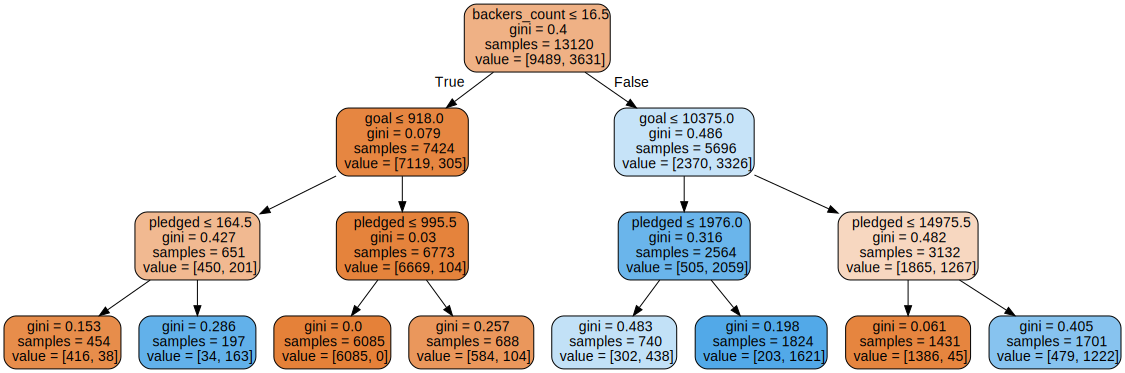

In [ ]:
import graphviz
# Create the Graphviz representation of the decision tree
dot_data = export_graphviz(dtc_3, out_file=None, 
                           feature_names=X_train.columns.values, 
                           filled=True, rounded=True,  
                           special_characters=True) 

# Render the Graphviz representation as a PNG image
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree')

# Display the decision tree in Jupyter Notebook
graph

## **3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

# train the classifier on the training set
knn.fit(X_train, y_train)

# make predictions on the testing set
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4034
         1.0       0.97      0.94      0.95      1589

    accuracy                           0.97      5623
   macro avg       0.97      0.96      0.97      5623
weighted avg       0.97      0.97      0.97      5623



In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_knn)

Accuracy: 0.9743908945402809


# **4. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=1)

rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4034
         1.0       0.96      0.99      0.97      1589

    accuracy                           0.99      5623
   macro avg       0.98      0.99      0.98      5623
weighted avg       0.99      0.99      0.99      5623



In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9850613551484972


# **5. SVM**

In [ ]:
from sklearn.svm import SVC
# Initialize the SVM model
svc = SVC(kernel='rbf')

# Train the SVM model
svc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svc.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_svm)

Accuracy: 0.7983282945047128


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      4034
         1.0       0.92      0.31      0.47      1589

    accuracy                           0.80      5623
   macro avg       0.85      0.65      0.67      5623
weighted avg       0.82      0.80      0.76      5623



# **Accuracies before Cross validation For Binary Classification**

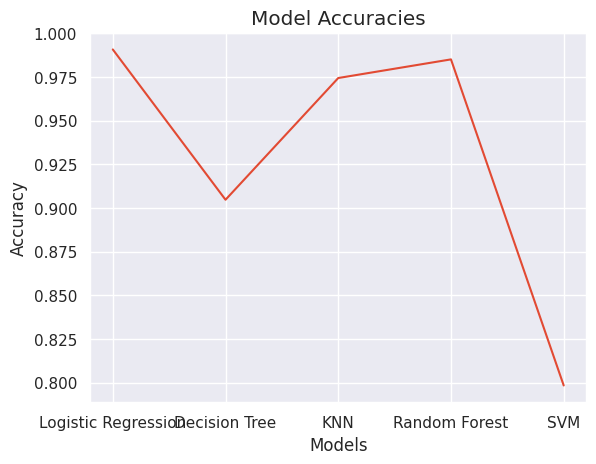

In [ ]:
accuracy = [accuracy_log, accuracy_dtc, accuracy_knn, accuracy_rf, accuracy_svm]
labels = ["Logistic Regression", "Decision Tree","KNN", "Random Forest","SVM"]
plt.plot(labels, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

plt.show()

# **Using Cross Validation For Binary Classification**

Random Forest Accuracy: 0.97 (+/- 0.01)
Logistic Accuracy: 0.87 (+/- 0.07)
K-Nearest Neighbors Accuracy: 0.97 (+/- 0.01)
Decision Tree Accuracy: 0.90 (+/- 0.03)
SVM Accuracy: 0.80 (+/- 0.05)


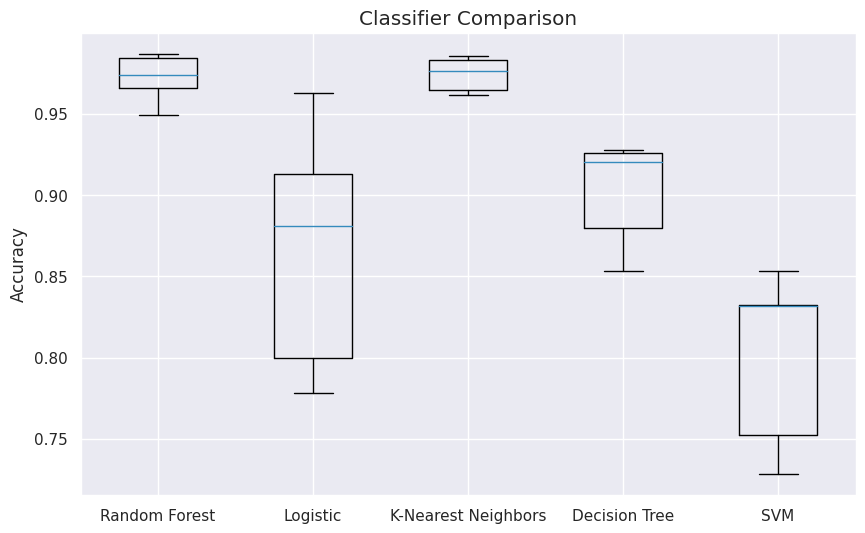

In [ ]:
# create a dictionary of classifiers
from sklearn.model_selection import cross_val_score

classifiers = {'Random Forest': RandomForestClassifier(n_estimators=100),
               'Logistic': LogisticRegression(random_state=1),
               'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
               'Decision Tree': DecisionTreeClassifier(max_depth = 3),
               'SVM' : SVC(kernel = 'rbf')}

# perform cross-validation on each classifier
scores = {}
for clf_name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, val_x, val_y, cv=5)
    scores[clf_name] = cv_scores
    print(f"{clf_name} Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

# plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores.values())
ax.set_xticklabels(scores.keys())
ax.set_title('Classifier Comparison')
ax.set_ylabel('Accuracy')
plt.show()